Ch2. 신경망의 수학적 구성 요소
--------

### 2.1 신경망과의 첫 만남

In [33]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as K
from keras import models, layers

%matplotlib inline

In [2]:
# load mnist data from keras

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

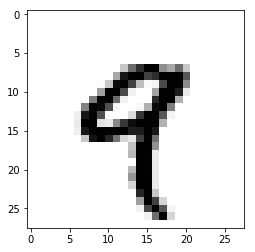

In [5]:
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

**activation 설정시**
- activation 값을 설정 할 때 마지막 layer에서 softmax로 했더니 에러가 남
- 해결책
  - https://keras.io/activations/
  - https://github.com/keras-team/keras/issues/9621#issuecomment-394664543
- 또는 tensorflow에서 바로 가져와도 된다.

```python
from keras import backend as K
model.add(Dense(64, activation=K.tanh))

from keras import backend as K
model.add(Lambda(lambda x: K.tf.nn.softmax(x)))
```

In [6]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation=tf.nn.softmax))

신경망의 핵심 구성 요소는 일종의 데이터 처리 필터라고 할 수 있는 layer(층)이다.
- 어떤 데이터가 들어가면 더 유용한 형태로 출력됨
- 그 다음 더 의미가 있는 representation을 입력된 데이터로부터 출력함


위의 예제에서는 fully connected된(완전 연결) 신경망 층인 Dense 층 2개가 속함
- 마지막 층은 10개의 확률 점수가 들어 있는 배열(모두 더하면 1입니다)을 반환하는 소프트맥스 층입니다. 각 점수는 현재 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률입니다.

In [7]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

신경망이 훈련 준비를 마치기 위해서 컴파일 단계에 포함될 세 가지가 더 필요합니다:

- loss function(손실 함수) : 훈련 데이터에서 신경망의 성능을 측정하는 방법으로 네트워크가 옳은 방향으로 학습될 수 있도록 도와 줍니다.
- optimizer(옵티마이저): 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘입니다.
- metrics(훈련과 테스트 과정을 모니터링할 지표) : 여기에서는 정확도(정확히 분류된 이미지의 비율)만 고려하겠습니다.

In [8]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

훈련을 시작하기 전에 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1 사이로 스케일을 조정합니다. 
- 예를 들어, 앞서 우리의 훈련 이미지는 [0, 255] 사이의 값인 uint8 타입의 (60000, 28, 28) 크기를 가진 배열로 저장되어 있습니다.
- 이 데이터를 0과 1 사이의 값을 가지는 float32 타입의 (60000, 28 * 28) 크기의 배열로 바꿉니다.

In [9]:
# 레이블을 범주형으로 인코딩

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.2559 - acc: 0.9264
Epoch 2/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.1021 - acc: 0.9702
Epoch 3/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0678 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.0495 - acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0372 - acc: 0.9891


In [11]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 45us/step
test_acc: 0.97


### 2.2 신경망을 위한 데이터 표현

모든 머신 러닝 시스템은 일반적으로 텐서를 기본 데이터 구조로 사용

**텐서는 무엇일까?**
- 데이터를 위한 컨테이너 개념
- 거의 항상 수치형 데이터를 다룸
- 텐서는 임의의 차원 개수를 가지는 행렬의 일반화된 모습
- 텐서에서는 dimension을 종종 축(axis)라고 부르기도 함

텐서에 대한 아주 좋은 설명
- https://www.youtube.com/watch?v=m0qwxNA7IzI
- 허민석 님 짱!

허민석 님의 tensor 강의 내역 정리

|rank|type    |example                                     |설명                                                          |
|----|--------|--------------------------------------------|------------------------------------------------------------|
|0   |scalar  |[1]                                         |숫자 하나만 가지고 있는 것                                             |
|1   |vector  |[1, 1]                                      |숫자를 여러개 가지고 있는 것 = vector                                   |
|2   |matrix  |[ [1, 1] , [1, 1] ]                         |vector를 여러개 가지고 있는 tensor = matrix rank 1 tensor를 여러개 가지고 있다|
|3   |3 tensor|[ [ [1, 1] , [1, 1] ], [ [1, 1] , [1, 1] ] ]|rank 2 tensor를 여러개 가지고 있다                                   |
|N   |N tensor|                                            |                                                            |

#### 2.2.1 스칼라(0D 텐서)

하나의 숫자만 담고 있는 텐서를 스칼라(scalar)라고 부름
- numpy에서는 float32, float64 타입의 숫자가 스칼라 텐서임
- ndim 속성을 사용하면 넘파이 배열의 축 개수를 확인 할 수 있음
- 스칼라 텐서의 축 개수는 0이다(ndim==0).


In [12]:
x = np.array(12)
print(x)
print(x.ndim)

12
0


#### 2.2.2 벡터(1D 텐서)

숫자의 배열을 벡터(vector) 또는 1D 텐서라고 부름
- 딱 하나의 축을 가짐

In [14]:
x = np.array([12, 3, 6, 14, 7])
print(x)
print(x.ndim)

[12  3  6 14  7]
1


- 이 벡터는 5개의 원소를 가지고 있으므로 5차원 벡터라고 부름
- 5D 벡터와 5D 텐서를 혼동하면 안 됨
- 5D **벡터**는 하나의 축을 따라 5개의 차원을 가진 것
- 5D **텐서**는 5개의 축을 가진 것
  - 텐서의 각 축을 따라 여러 개의 차원을 가진 벡터가 놓일 수 있다.

- 차원수는(dimensionality)는 특정 축을 따라 놓인 원소의 개수(5d-vector)이거나 텐서의 축 개수(5d-tensor)를 의미하므로 혼동하기 쉬움

In [15]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 37, 2]])

print(x)
print(x.ndim)

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 37  2]]
2


- 첫 번째 축에 놓여 있는 원소를 행이라 부른다.
- 두 번째 축에 놓여 있는 원소를 열이라 부른다.
- x의 첫 번째 행은 [5, 78, 2, 34, 0], 첫 번째 열은 [5,6,7] 이다

#### 2.2.4 3D 텐서와 고차원 텐서

In [16]:
x = np.array([[[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 37, 2]],
             [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 37, 2]],
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 37, 2]]
             ])

In [18]:
print(x)
print(x.ndim)

[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 37  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 37  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 37  2]]]
3


#### 2.2.5 핵심 속성
텐서는 3개의 핵심 속성으로 정의한다.

- **축의 개수(랭크)**
  - 예를 들어 3D 텐서에는 3개의 축이 있고, 행렬에는 2개의 축이 있다.
  - numpy의 ndim으로 확인 가능
- **크기(shape)**
  - 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 tuple
  - 예를 들어 앞에 나온 행렬의 크기는 (3,5)이고 3D 텐서의 크기는 (3,3,5)이다.
  - 벡터의 크기는 (5,) 처럼 1개의 원소로 이루어진 튜플
  - 배열 스칼라는 ()처럼 크기가 없다.
- **데이터 타입**
  - 텐서에 포함된 데이터의 타입
  - 예를 들면 텐서의 타입은 float32, float64, uint8 등이 될 수 있다.
  - 텐서는 사전에 할당되어 연속된 메모리에 저장되어야 하므로 numpy 배열은 가변 문자열을 지원하지 않음

In [20]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [21]:
print(train_images.ndim)

3


In [22]:
print(train_images.shape)

(60000, 28, 28)


In [23]:
# 8비트 정수형 3D 텐서
# 좀 더 정확하게는 28 * 28 크기의 정수 행렬 6만 개가 있는 배열
# 각 행렬은 하나의 흑백 이미지, 각 원소는 0에서 255 사이의 값을 가짐

print(train_images.dtype)

uint8


In [25]:
# train_images.dtype?

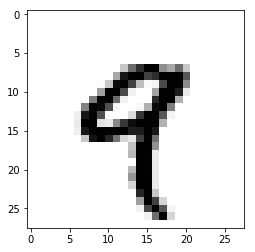

In [26]:
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#### 2.2.6 numpy로 텐서 조작하기

In [28]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [29]:
train_images[10:100, :, :].shape

(90, 28, 28)

In [30]:
train_images[10:100, 0:28, 0:28].shape

(90, 28, 28)

#### 2.2.7 배치 데이터

일반적으로 딥러닝에서 사용하는 모든 데이터 텐서의 첫 번째 축은 샘플 축(sample axis)이다.
- 딥러닝 모델은 한 번에 전체 데이터셋을 처리 하지 않음
- 그 대신 데이터를 작은 배치(batch)로 나눔
- 구체적으로 MNIST 숫자 데이터에서 크기가 128인 배치 하나는 다음과 같다.

In [33]:
batch_one = train_images[:128]

In [34]:
batch_one.shape

(128, 28, 28)

In [35]:
batch_two = train_images[128:256]

batch_n = train_images[128 * n : 128(n * 1)]

- 이런 배치 데이터를 다룰 때는 첫 번째 축을 배치 축 또는 배치 차원이라고 함

#### 2.2.8 텐서의 실제 사례
- 벡터 데이터 : (samples, features), 2D
- 시계열 데이터, sequence 데이터 : (samples, timesteps ,features), 3D
- 이미지 데이터 : (samples, height, width, channels), (samples, channels, height, width), 4D
- 동영상 데이터 : (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width), 5D

#### 2.2.9 벡터 데이터 ~ 2.2.12 비디오 데이터
- 자세한 내용은 책 참조


흑백 이지미의 경우 컬러 채널의 차원 크기는 1
- 256 * 256 크기의 흑백 이미지에 대한 128개의 배치는 (128, 256, 256, 1)

이미지 텐서 크기를 지정하는 방법은 두 가지
- channel_last
  - 텐서플로우에서 사용
- channel_first
  - 씨애노에서 사용
- keras는 둘 다 지원

### 2.3 신경망의 톱니바퀴 : 텐서 연산

```python
keras.layers.Dense(512, activation='relu')
```

```bash
output = relu(dot(W, input) + b)
```

- 정리하면 3개의 텐서 연산이 위 수식에 있다.
- 입력 텐서와 텐서 W 사이이 dot product
- 그 결과를 b와 덧셈
- 마지막으로 relu 연산 ( relu(x) 는 max(x, 0)임 )

#### 2.3.1 원소별 연산
- relu 함수와 덧셈은 원소별 연산. 자세한 코드는 책 잠조


```python
z = x + y # 원소별 덧셈

z = np.maximum(z, 0.) # 원소별 렐루 함수
```

#### 2.3.2 브로드캐스팅

크기가 다른 두 텐서가 더해질 때 어떻게 될까?
- 작은 텐서가 큰 텐서의 크기에 맞추어 브로드캐스팅(broadcasting) 됨
- 브로드캐스팅은 두 단계로 이루어짐
  - 큰 텐서의 ndim에 맞도록 작은 텐서의(브로드캐스팅 축이라고 부르는) 축이 추가됨
  - 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복

In [3]:
np.broadcast?

Init signature: np.broadcast(self, /, *args, **kwargs)
Docstring:     
Produce an object that mimics broadcasting.

Parameters
----------
in1, in2, ... : array_like
    Input parameters.

Returns
-------
b : broadcast object
    Broadcast the input parameters against one another, and
    return an object that encapsulates the result.
    Amongst others, it has ``shape`` and ``nd`` properties, and
    may be used as an iterator.

See Also
--------
broadcast_arrays
broadcast_to

Examples
--------

Manually adding two vectors, using broadcasting:

>>> x = np.array([[1], [2], [3]])
>>> y = np.array([4, 5, 6])
>>> b = np.broadcast(x, y)

>>> out = np.empty(b.shape)
>>> out.flat = [u+v for (u,v) in b]
>>> out
array([[5.,  6.,  7.],
       [6.,  7.,  8.],
       [7.,  8.,  9.]])

Compare against built-in broadcasting:

>>> x + y
array([[5, 6, 7],
       [6, 7, 8],
       [7, 8, 9]])
File:           /opt/conda/lib/python3.7/site-packages/numpy/__init__.py
Type:           type
Subclasses:     


In [6]:
# example broadcast

x = np.array([[1], [2], [3]])
y = np.array([4, 5, 6])

print(x.ndim, y.ndim)

b = np.broadcast(x, y)
print(b)

2 1


In [7]:
b.shape

(3, 3)

In [9]:
out = np.empty(b.shape)
out.flat = [u+v for (u,v) in b]
out

array([[5., 6., 7.],
       [6., 7., 8.],
       [7., 8., 9.]])

In [15]:
x.shape, y.shape

((3, 1), (3,))

In [8]:
x + y

array([[5, 6, 7],
       [6, 7, 8],
       [7, 8, 9]])

#### 2.3.3 텐서 점곱

- 텐서 곱셉(tensor product)이라고도 부르는 점곱 연산(dot operation)은 가장 널리 사용되고 유용한 텐서 연산
- 원소별 연산과 반대로 입력 텐서의 원소들을 결합 시킴

```python3
import numpy as np

z = np.dot(x, y)
z = x * y
```

#### 2.3.4 텐서 크기 변환

tensor reshaping

```python3
train_images = train_images.reshape((60000, 28 * 28))
```

텐서의 크기를 변환한다는 것은 특정 크기에 맞게 열과 행을 재배열한다는 뜻
- 당연히 크기가 변환된 텐서는 원래 텐서와 원소 개수가 동일

In [25]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])

print(x.shape)

(3, 2)


In [26]:
x = x.reshape((6, 1))

In [27]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [28]:
x = x.reshape((2, 3))
print(x)

[[0. 1. 2.]
 [3. 4. 5.]]


자주 사용하는 특별한 크기 변환은 전치(transposition)
- 행렬의 전치는 행과 열을 바꾸는 것을 의미

In [30]:
x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)

(20, 300)


#### 2.3.5 텐서 연산의 기하학적 해석
- 책 참조

#### 2.3.6 딥러닝의 기하학적 해석
- 책 참조

### 2.4 신경망의 엔진 : optimazer based gradient

```bash
output = relu(dot(W, input) + b)
```

위 식에서 텐서 W와 b는 층의 속성처럼 볼 수 있다.
- 가중치(weight) 또는 훈련되는 파라미터(trainable parameter)라고 볼 수 있다.
- 또는 각각 kernel과 bias라고 부르기도 한다.
- 이런 가중치에는 훈련 데이터를 신경망에 노출시켜서 학습된 정보가 담겨 있다.

초기 가중치 행렬이 작은 난수로 채워져 있음
- 처음에는 의미 없는 표현이지만, 피드백 신호에 기초하여 가중치가 점진적으로 조정됨
- 이런 것을 우리는 training이라고 부름
- 반복...


단계
1. 훈련 샘플 x와 이에 상응하는 타깃 y의 배치를 추출
2. x를 사용하여 forward pass, 예측 y_pred를 구함
3. y_pred와 y의 차이를 측정하여 이 배치에 대한 네트워크의 loss를 계산
4. 배치에 대한 손실이 조금 감소되도록 네트워크의 모든 가중치를 업데이트


**연산 과정에서 신경망에 사용된 모든 연산이 미분 가능(differentiable)하다는 장점을 사용하여 네트워크 가중치에 대한 손실의 gradient를 계산하는 것이 훨씬 더 좋은 방법**

#### 2.4.2 텐서 연산의 변화율 : gradient

gradient는 텐서 연산의 변화율
- 다차원 입력, 즉 텐서를 입력으로 받는 함수에 변화율 개념을 확장 시킨 것
- 자세한 건 책 잠조

#### 2.4.3 확률적 경사 하강법

Gradient Descent(경사 하강법)
- 미분 가능한 함수가 주어지면 이론적으로 이 함수의 최솟값을 해석적으로 구할 수 있다.
- 함수의 최솟값은 변화율이 0인 지점
- 신경망에 적용하면 가장 작은 손실 함수의 값을 만드는 가중치의 조합을 해석적으로 찾는 것을 의미함
- gradient(f)(W) = 0을 풀면 됨(gradient(f)는 변화율 함수)


1. 훈련 샘플 배치 x와 이에 상응하는 타깃 y를 추출
2. x로 네트워크를 실행하고 예측 y_pred를 구함
3. 이 배치에서 y_pred와 y 사이의 오차를 측정하여 네트워크의 손실을 계산
4. 네트워크의 파라미터에 대한 손실 함수의 gradient를 계산(backward pass...)
5. gradient의 반대 방향으로 파라미터를 조금 이동 시킴. 예를 들어 W -= step * gradient 하면 배치에 대한 손실이 조금 감소할 것

> 위의 과정을 mini-batch stochastic gradient descent라고 함(미니 배치 확률적 경사 하강법), 속칭 SGD

> 확률적이라는 각 배치 데이터가 무작위로 선택한다는 의미

![alt text](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

learning rate를 적절히 고르는 것이 중요
- 이 값이 너무 작으면 곡선을 따라 내려가는 데 너무 많은 반복이 필요하고 local minimum에 갇힐 수 있음
- 너무 크면 loss function에서 완전히 임의의 위치로 이동시킬 수 있음

여러 가지 방법이 있다.
- 반복마다 하나의 샘플과 하나의 타깃을 뽑는 것
- 가용한 모든 데이터를 사용하여 반복 실행(이를 SGD라고 함)
  - 단 비용이 많이 듬
- 적절하게 잘 사용하자

또다른 바업ㅂ으로는 현재 gradient 값만 보지 않고 이전에 업데이트된 가중치를 여러 가지 다른 방식으로 고려하는 SGD의 변화된 방식이 있음
- 예를 들면 momentum을 사용한 SGD, Adagrad, RMSProp 등
- 이런 방법들은 모두 optimization method 또는 옵티마이저 라고 부름
- momentum은 SGD에 있는 2개의 문제점인 수렴 속도와 지역 최솟값을 해결함

![alt text](https://www.researchgate.net/profile/Marc_Sevaux/publication/258159898/figure/fig1/AS:612163295141889@1522962511560/Minimum-local-et-global.png)


물리학에서 영감을 얻은 모멘텀....
- loss function 위로 작은 공을 굴리는 것으로 생각하면 이해가 쉬움
- 모멘텀이 충분하다면 공이 골짜기에 갇히지 않고 global minumum에 도달할 것
- 현재 기울기 뿐만 아니라, 과거 기울기도 고려하여 움직이기 때문이다.


```python
# example code of momentum

past_velocity = 0
momentum = 0.1
while loss > 0.01:
    w, loss, gradient = get_current_parameters()
    velocity = momentum * past_velocity - learning_rate * gradient
    w = w + momentum * velocity - learning_rate * gradient
    past_velocity = velocity
    update_parameter(w)
```

#### 2.4.4 변화율 연결 : 역전파 알고리즘
- 책 참조
- 연쇄 미분 기억하면 됨
- 수식 보다는 gradient와 optimizer에 대해 잘 이해하자.

### 2.5 첫 번째 예제 다시 살펴보기

In [39]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28* 28))
train_images = train_images.astype('float32') /255

test_images = test_images.reshape((10000, 28* 28))
test_images = test_images.astype('float32') /255

In [40]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
network.add(layers.Dense(10, activation='softmax'))

In [41]:
# categorical_crossentropy은 loss function이다.
# 가중치 텐서를 학습하기 위한 피드백 신호로 사용되며, 훈련하는 동안 최소화 된다.
# 미니 배치 SGD를 통해 손실이 감소됨
# gradient descent 적용하는 구체적인 방식은 첫 번째 매개변수로 전달된 rmsprop 옵티마이저에 의해 결정됨

network.compile(
    loss='categorical_crossentropy', # loss function
    optimizer='rmsprop', #
    metrics=['accuracy']
)

In [43]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [44]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.2520 - accuracy: 0.9272
Epoch 2/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.1028 - accuracy: 0.9695
Epoch 3/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0684 - accuracy: 0.9796
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0488 - accuracy: 0.9858
Epoch 5/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0373 - accuracy: 0.9887


In [45]:
network.predict(test_images)

array([[1.8906164e-08, 3.6788245e-10, 8.2435565e-07, ..., 9.9988306e-01,
        3.7492121e-08, 3.6396308e-05],
       [2.2148060e-12, 2.3510593e-06, 9.9999726e-01, ..., 1.9944214e-16,
        1.2518305e-07, 6.8040026e-17],
       [1.1733110e-08, 9.9978811e-01, 2.6602076e-05, ..., 1.2279156e-04,
        4.0634954e-05, 3.3867431e-07],
       ...,
       [1.3194150e-13, 6.4476940e-10, 1.1278363e-10, ..., 7.0820561e-06,
        4.5319254e-07, 6.4053544e-04],
       [6.6864139e-11, 5.6971896e-11, 3.4966024e-13, ..., 2.6602515e-10,
        2.1423295e-06, 5.2268259e-12],
       [2.0387943e-11, 1.4202460e-15, 1.7460650e-09, ..., 9.4304976e-17,
        2.0928981e-12, 9.8973150e-14]], dtype=float32)

### 2.6 요약

- 학습(learning)은 훈련 데이터 샘플과 그에 상응하는 타깃이 주어졌을 때 손실 함수를 최소화 하는 모델 파라미터의 조합을 찾는 것을 의미
- 데이터 샘플과 타깃의 배치를 랜덤하게 뽑고 이 배치에서 손실에 대한 파라미터의 그래디언트를 계산함으로써 학습 진행됨
- 전체 학습 과정은 신경망이 미분 가능한 텐서 연산으로 연결되어 있기 때문에 가능. 미분의 연쇄 법칙을 잊지 말자(고2 때 나옴...)
- loss 와 optimizer는 짱짱 중요함, 네트워크에 데이터를 입력하기 전에 정의되어야 함
- loss는 훈련하는 동안 최소화해야 할 양이므로 해결하려는 문제의 성공을 측정하는 데 사용
- optimizer는 손실에 대한 gradient가 parameter를 업데이트하는 정확한 방식을 정의
  - 예를 들어 RMSProp, SGD 등